<a href="https://colab.research.google.com/github/bruh-denis/openCV/blob/main/Laba_3/Homework_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

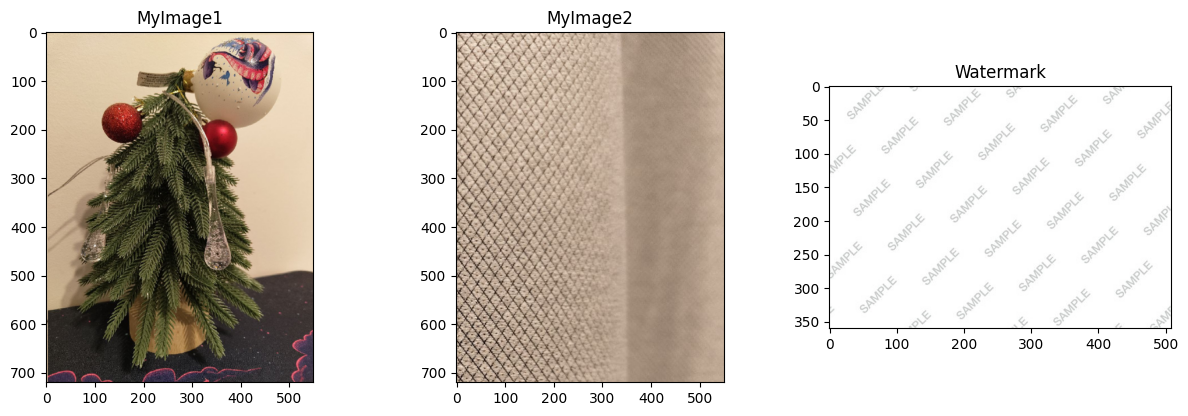

In [53]:
image1 = cv2.imread("MyImage1.png")
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

image2 = cv2.imread("MyImage2.png")
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

watermark = cv2.imread("Watermark.png")
watermark = cv2.cvtColor(watermark, cv2.COLOR_BGR2RGB)

plt.subplot(231), plt.imshow(image1), plt.title("MyImage1")
plt.subplot(232), plt.imshow(image2), plt.title("MyImage2")
plt.subplot(233), plt.imshow(watermark), plt.title("Watermark")

plt.show()

# Інвертування кольорової інтенсивності


In [34]:
def invert_image(image):
    return cv2.bitwise_not(image)

inverted_image = invert_image(image1)

# Зміна компоненти (додаємо 50 до червоного каналу)

In [35]:
def modify_component(image, component, value):
    channel_index = {"B": 0, "G": 1, "R": 2}
    modified_image = image.copy()
    modified_image[:, :, channel_index[component]] = np.clip(
        modified_image[:, :, channel_index[component]] + value, 0, 255
    )
    return modified_image

modified_image = modify_component(image1, "R", 50)

# Розбиття на канали

In [36]:
def split_channels(image):
    return cv2.split(image)

b_channel, g_channel, r_channel = split_channels(image1)

# Злиття зображень

In [37]:
def merge_images(image1, image2, alpha):
    return cv2.addWeighted(image1, alpha, image2, 1 - alpha, 0)

merged_image = merge_images(image1, image2, 0.4)

# Реалізація матричних фільтрів

In [38]:
# Фільтр розмиття
blur_kernel = np.ones((7, 7), np.float32) / 25
def apply_filter(image, kernel):
    return cv2.filter2D(image, -1, kernel)

blurred_image = apply_filter(image1, blur_kernel)

# Фільтр чіткості
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)
sharpened_image = apply_filter(image1, sharpen_kernel)

# Фільтр Собеля
def apply_sobel(image, direction):
    if direction == 'x':
        return cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    elif direction == 'y':
        return cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

sobel_x = apply_sobel(image1, 'x')
sobel_y = apply_sobel(image1, 'y')

# Вбудовування водяного знаку

In [39]:
def embed_watermark(container, watermark, bit_plane):
    blue_channel = container[:, :, 2]
    resized_watermark = cv2.resize(watermark, (blue_channel.shape[1], blue_channel.shape[0]))

    gray_watermark = cv2.cvtColor(resized_watermark, cv2.COLOR_BGR2GRAY)

    _, binary_watermark = cv2.threshold(gray_watermark, 128, 1, cv2.THRESH_BINARY)
    modified_channel = blue_channel & ~(1 << bit_plane)
    modified_channel |= (binary_watermark << bit_plane)
    container[:, :, 2] = modified_channel
    return container

watermarked_image = embed_watermark(image1, watermark, 1)

# Відображення результатів

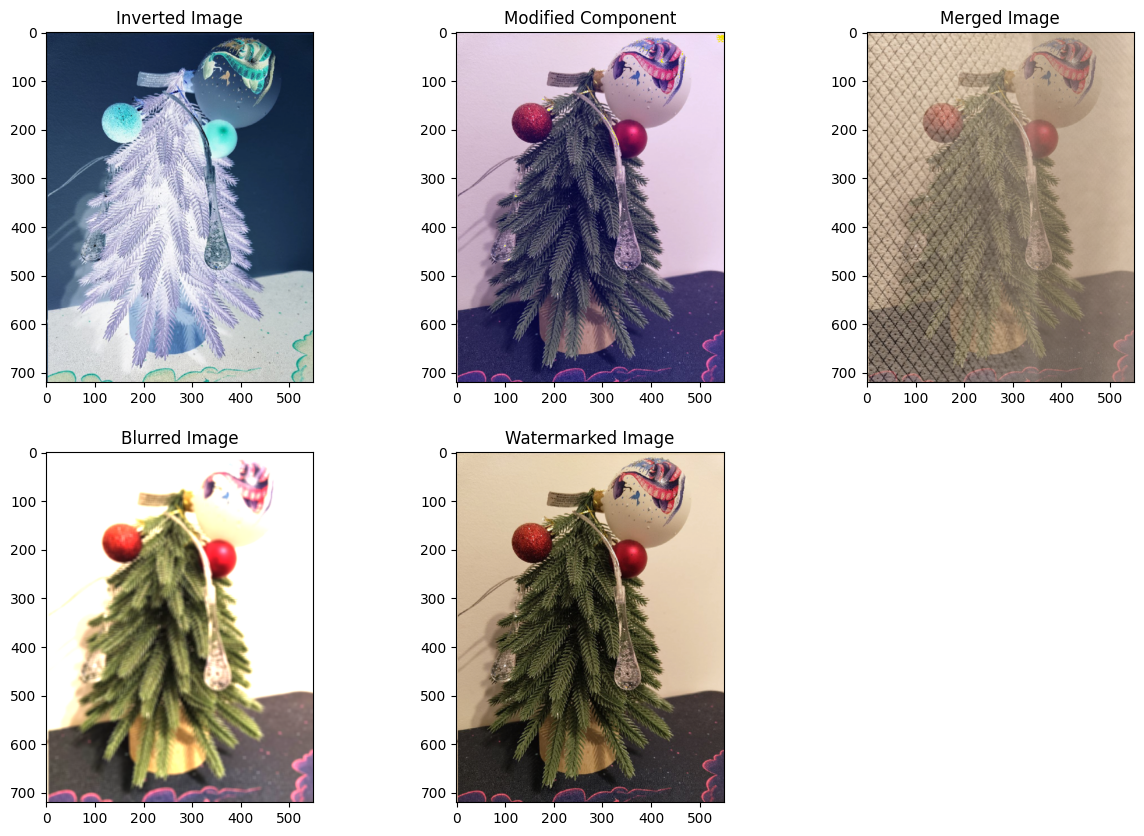

In [40]:
plt.subplot(231), plt.imshow(inverted_image), plt.title("Inverted Image")
plt.subplot(232), plt.imshow(modified_image), plt.title("Modified Component")
plt.subplot(233), plt.imshow(merged_image), plt.title("Merged Image")
plt.subplot(234), plt.imshow(blurred_image), plt.title("Blurred Image")
plt.subplot(235), plt.imshow(watermarked_image), plt.title("Watermarked Image")
plt.show()
